# 모평균 추정하기: 좀더 일반적인 경우
정규분포와 라플라스 분포에서 평균값과 중앙값이 일치하는 것은 매우 이례적인 현상이다. 하지만 주어진 분포에서 일치하는 여러 가지 값을 고안해낼 수 있다.
- 절사평균: 평균값과 중앙값을 모두 포함하는 일반적인 개념

In [ ]:
uni=[-1,-1,0,0,0,0,0,1,1,1]
print('모평균',sum(uni)/len(uni))
print('절사 평균 10%-',sum(uni[1:-1])/len(uni[1:-1]))
print('절사 평균 20%-',sum(uni[2:-2])/len(uni[2:-2]))

모평균 0.1
절사 평균 10%- 0.125
절사 평균 20%- 0.16666666666666666


뭐 당연히 분포가 대칭적이라면 절사평균은 다 똑같겠지만, 그에 대한 표본에서는 달라질 것이다.. 당연한 얘기

9:1의 비율로 정상시력의 집단과 비정상 시력의 집단을 구해보자.

In [ ]:
# 정상 시력 90000명
loc, scale = 0., 1. 
normal = np.random.normal(loc, scale, 90000)

#비정상 시력 10000명
loc, scale = 0., 3**(1/2) 
abnormal = np.random.normal(loc, scale, 10000)

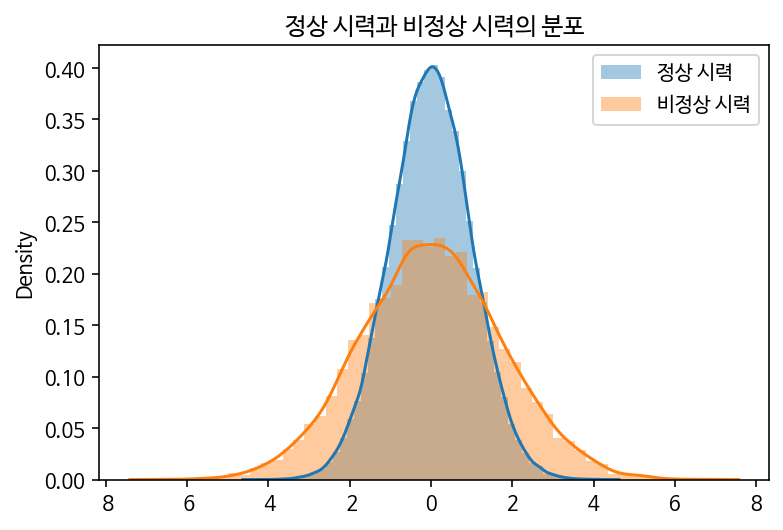

In [ ]:
plt.title('정상 시력과 비정상 시력의 분포')
sns.distplot(normal, label="정상 시력")
sns.distplot(abnormal, label="비정상 시력")
plt.legend()
plt.show()

In [ ]:
print('정상 시력의 평균:',round(np.mean(normal),0))
print('정상 시력의 분산:',round(np.var(normal),0))
print('비정상 시력의 평균:',round(np.mean(abnormal),0))
print('비정상 시력의 분산:',round(np.var(abnormal),0))

정상 시력의 평균: -0.0
정상 시력의 분산: 1.0
비정상 시력의 평균: 0.0
비정상 시력의 분산: 3.0


In [ ]:
# 정상 시력과 비정상 시력 집단을 합치자.
normal_li=list(normal)
abnormal_li=list(abnormal)
normal_li.extend(abnormal_li)
normal_li.sort()
sight= np.array(normal_li)

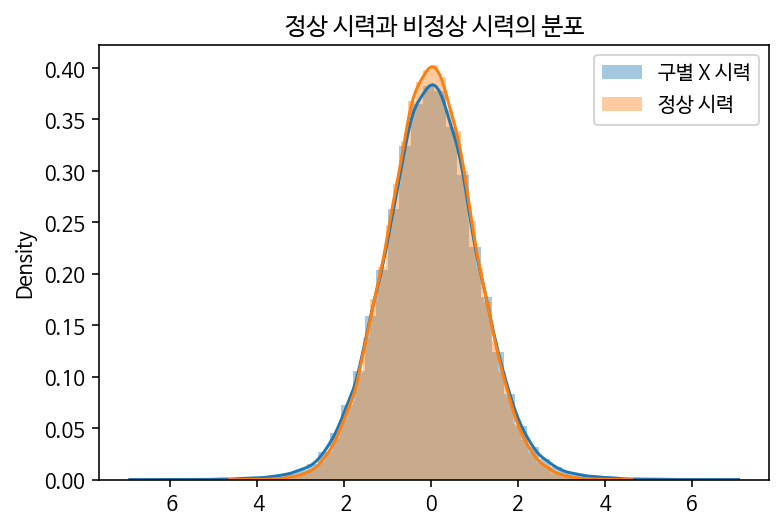

In [ ]:
plt.title('정상 시력과 비정상 시력의 분포')
sns.distplot(sight, label="구별 X 시력")
sns.distplot(normal, label="정상 시력")
#sns.distplot(abnormal, label="비정상 시력")
plt.legend()
plt.show()               

확실히 혼합정규분포(구별 X)가 실제 정상시력의 분포보다 평균에 대한 분포가 더 낮게 나타나고, 꼬리가 두껍게 나타나는 것을 볼 수 있다.

하지만 절사 평균을 적용하면 어떻게 될까?

- 정상시력에서 절사 평균
  - 큰차이가 나타나지 않음.

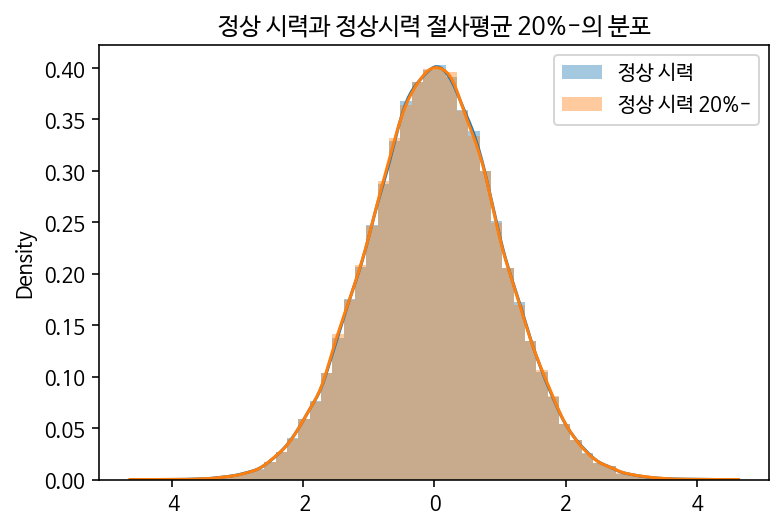

In [ ]:
plt.title('정상 시력과 정상시력 절사평균 10%-의 분포')
sns.distplot(normal, label="정상 시력")
sns.distplot(normal[9000:-9000], label="정상 시력 10%-")
plt.legend()
plt.show()  

- 혼합정규분포에서 절사 평균
 - 절사평균의 확률분포가 기존 평균의 확률분포보다 확실히 높게 나타난다.

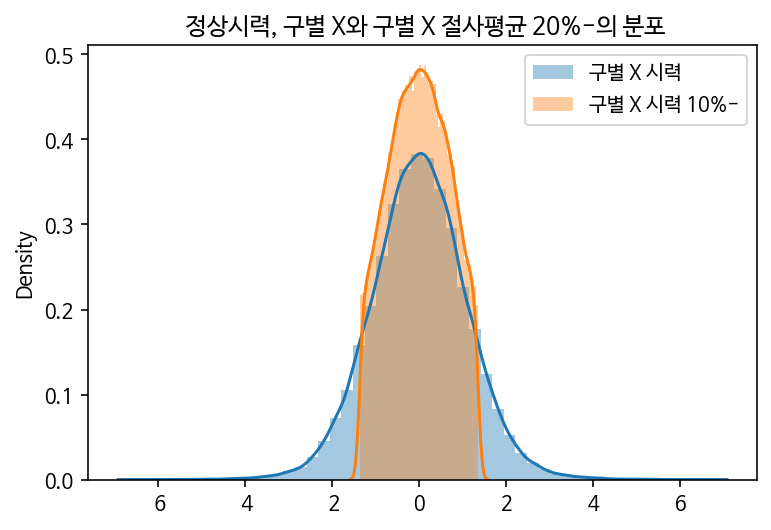

In [ ]:
plt.title(' 정상시력, 구별 X와 구별 X 절사평균 20%-의 분포')
sns.distplot(sight, label="구별 X 시력")
sns.distplot(sight[10000:-10000], label="구별 X 시력 10%-")
plt.legend()
plt.show()  

정규분포와 비슷하지만 좀더 굵은 꼬리를 가지는 모분포 일 때, 절사평균을 사용하면 기존 평균보다 좀더 효율적으로 추정할 수 있다.

---
참고
- 기초 통계학의 숨은 원리 이해하기
- https://m.blog.naver.com/PostView.nhn?blogId=parksehoon1971&logNo=221576978566&proxyReferer=https:%2F%2Fwww.google.co.kr%2F
- https://rfriend.tistory.com/284

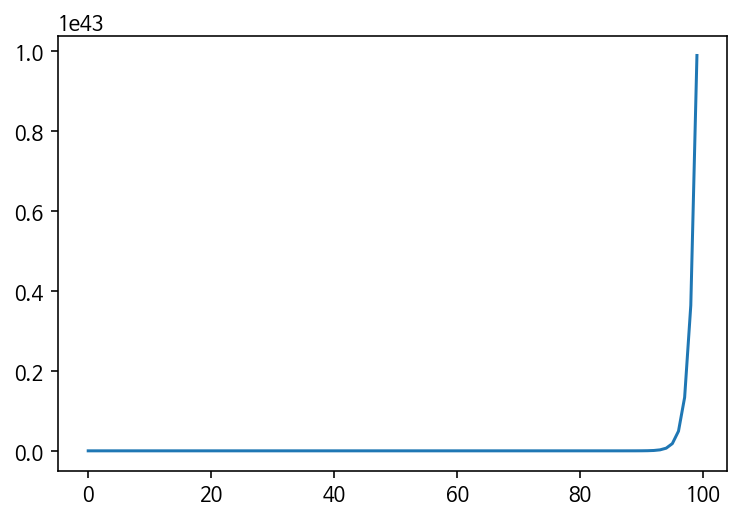

In [ ]:
# 지수 함수
plt.plot(np.exp(np.array([i for i in range(0,100)])))